In [1]:
!wget -O train.csv https://raw.githubusercontent.com/Arnax308/datasets/main/training_binary_class.csv
!wget -O test.csv https://raw.githubusercontent.com/Arnax308/datasets/main/test2_complete.csv

--2024-07-22 07:30:24--  https://raw.githubusercontent.com/Arnax308/datasets/main/training_binary_class.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441981 (432K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 431.62K  --.-KB/s    in 0.05s   

2024-07-22 07:30:24 (9.20 MB/s) - ‘train.csv’ saved [441981/441981]

--2024-07-22 07:30:24--  https://raw.githubusercontent.com/Arnax308/datasets/main/test2_complete.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114064 (111K) [text/plain]
Sav

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
df= pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
uni_df = pd.concat([df, test_df])

In [10]:
uni_df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [11]:
uni_df.head()

,Headlines,Article,Companies,Sectors,Interest
0,Coal India revises e-auction norms: Is there m...,Highlights Coal India announces plans to ease...,Coal India,Energy,1
1,D-Mart: Margin miss in Q1; valuations expensive,"Highlights Healthy revenue growth, but margin...",D-Mart,Retail,1
2,"TCS chief cautious of economic slowdown, but r...",Tata Consultancy Services Ltd (TCS) stays caut...,TCS,Information Technology,1
3,SBI raises lending rates by 5-10 bps across mo...,State Bank of India (SBI) has raised its bench...,SBI,Banking,1
4,"Investors of TCS, HCL should tally their optim...",Shares of Tata Consultancy Services (TCS) and ...,TCS,Information Technology,0


In [12]:
X = uni_df['Article']
y = uni_df['Interest'].values

In [13]:
token = Tokenizer()
token.fit_on_texts(X)
word_indices = token.texts_to_sequences(X)

In [14]:
print(word_indices[0])

[230, 386, 20, 3746, 98, 3, 1795, 372, 2097, 1592, 5222, 1188, 3, 274, 5223, 200, 881, 7, 372, 2097, 1189, 1796, 167, 108, 28, 836, 417, 399, 208, 3, 167, 4, 504, 11, 275, 112, 372, 2097, 387, 3, 482, 1429, 2098, 553, 386, 20, 3747, 400, 18, 5224, 40, 2099, 18, 5225, 5226, 24, 401, 697, 1, 197, 386, 2996, 22, 4, 1, 505, 17, 3748, 3, 1190, 28, 2, 260, 386, 1297, 98, 3, 882, 554, 216, 112, 11, 27, 1191, 4, 1430, 1, 22, 117]


In [15]:
vocab = token.word_index
len(vocab) # 8500 words not bad, we wont be missing common words atleast

9605

In [16]:
print(vocab)

{'the': 1, 'of': 2, 'to': 3, 'in': 4, 'and': 5, 'a': 6, 'for': 7, 'on': 8, 'said': 9, 'is': 10, 'with': 11, 'has': 12, 'its': 13, 'as': 14, 'it': 15, 'by': 16, 'that': 17, 'rs': 18, 'will': 19, 'india': 20, 'at': 21, 'company': 22, 'from': 23, 'crore': 24, 'an': 25, 'year': 26, 'this': 27, 'percent': 28, 'are': 29, 'be': 30, 'also': 31, 'growth': 32, 'our': 33, 'per': 34, 'have': 35, '1': 36, 'which': 37, 'new': 38, 'was': 39, 'market': 40, 'business': 41, 'up': 42, 'we': 43, 'not': 44, 'over': 45, '2': 46, 'he': 47, 'or': 48, 'financial': 49, 'been': 50, 'cent': 51, '5': 52, 'bank': 53, '”': 54, 'had': 55, 'june': 56, 'quarter': 57, 'more': 58, 'group': 59, '3': 60, 'last': 61, 'their': 62, 'reported': 63, 'after': 64, '2024': 65, 'according': 66, '000': 67, 'capital': 68, 'billion': 69, 'one': 70, 'than': 71, 'tata': 72, 'july': 73, 'firm': 74, 'through': 75, 'two': 76, 'statement': 77, 'added': 78, 'sales': 79, 'million': 80, 'years': 81, 'report': 82, 'government': 83, 'stake': 84,

In [17]:
print(max(len(i) for i in word_indices))

1204


In [18]:
max_len = max(len(i) for i in word_indices)
word_indices_padded = pad_sequences(word_indices, maxlen=max_len, padding='post')
word_indices_np_padded = np.array(word_indices_padded)

In [19]:
max_len

1204

In [20]:
one_hot_encoded = token.texts_to_matrix(X, mode='binary')

In [21]:
one_hot_encoded.shape

(303, 9606)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
y = np.asarray(y).astype('float32')

In [24]:
x_train, x_hold, y_train, y_hold = train_test_split(one_hot_encoded,y, test_size = 0.3, random_state = 42)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [26]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=15);

Epoch 1/15
7/7 [==============================] - 1s 20ms/step - loss: 0.6814 - accuracy: 0.5660
Epoch 2/15
7/7 [==============================] - 0s 17ms/step - loss: 0.3906 - accuracy: 0.9858
Epoch 3/15
7/7 [==============================] - 0s 19ms/step - loss: 0.1565 - accuracy: 1.0000
Epoch 4/15
7/7 [==============================] - 0s 19ms/step - loss: 0.0460 - accuracy: 1.0000
Epoch 5/15
7/7 [==============================] - 0s 16ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 6/15
7/7 [==============================] - 0s 18ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/15
7/7 [==============================] - 0s 19ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/15
7/7 [==============================] - 0s 18ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/15
7/7 [==============================] - 0s 17ms/step - loss: 6.6799e-04 - accuracy: 1.0000
Epoch 10/15
7/7 [==============================] - 0s 17ms/step - loss: 5.1456e-04 - accuracy: 1.0000
Epoch 11/15
7/7 [====

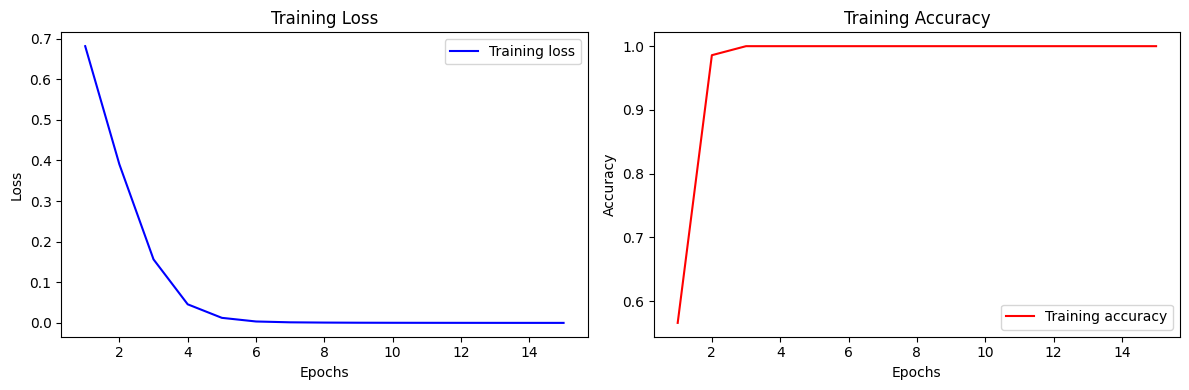

In [29]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(loss) + 1)

# Plotting the loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
y_pred_prob = model.predict(x_hold)

3/3 [==============================] - 0s 5ms/step


In [31]:
y_pred_prob.shape

(91, 1)

In [32]:
threshold = 0.5

# Convert probabilities to class labels
y_pred_class = (y_pred_prob >= threshold).astype(int)

In [33]:
accuracy = np.mean(y_pred_class == y_hold.reshape(-1, 1))
accuracy

0.7032967032967034

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_hold, y_pred_class)

In [36]:
cm

array([[38,  9],
       [18, 26]])

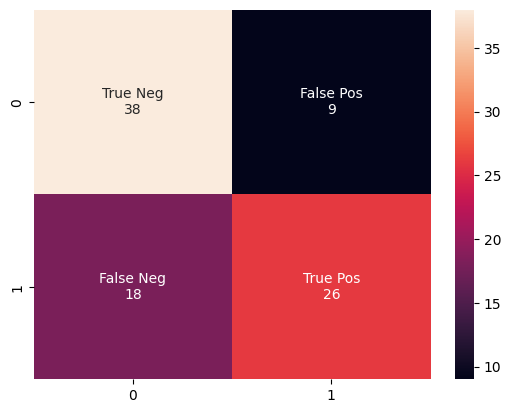

In [37]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='');
#Left side is actual labels and the one at the bottom predicted

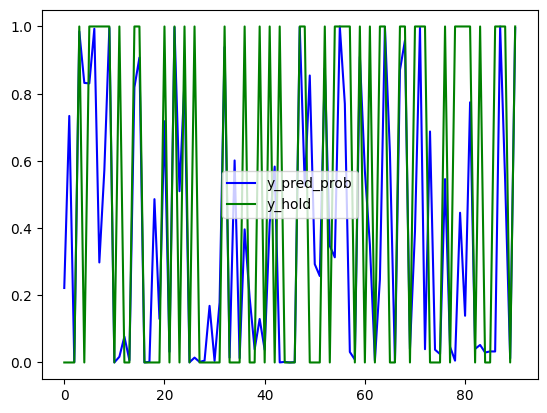

In [38]:
plt.plot(y_pred_prob, label='y_pred_prob', color='blue')
plt.plot(y_hold, label='y_hold', color='green');
plt.legend();

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_hold, y_pred_class)
recall = recall_score(y_hold, y_pred_class)
f1 = f1_score(y_hold, y_pred_class)
roc_auc = roc_auc_score(y_hold, y_pred_prob)

In [40]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Precision: 0.7429
Recall: 0.5909
F1 Score: 0.6582
ROC AUC: 0.8085
